In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the binary image 
# You can replace 'binary_image.png' with your own image file.
img = cv2.imread('binary_image.png', cv2.IMREAD_GRAYSCALE)

# If not already binary, threshold it
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

In [3]:
# Edge detection (optional for noisy images)
edges = cv2.Canny(binary, 50, 150, apertureSize=3)

In [4]:
# Detect lines using Probabilistic Hough Transform
lines = cv2.HoughLinesP(
    edges,                # edge-detected image
    rho=1,                # distance resolution in pixels
    theta=np.pi/180,      # angle resolution in radians
    threshold=50,         # minimum number of votes
    minLineLength=30,     # minimum line length
    maxLineGap=10         # maximum allowed gap between line segments
)



In [5]:
# Draw the detected lines 
line_img = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 0, 255), 2)



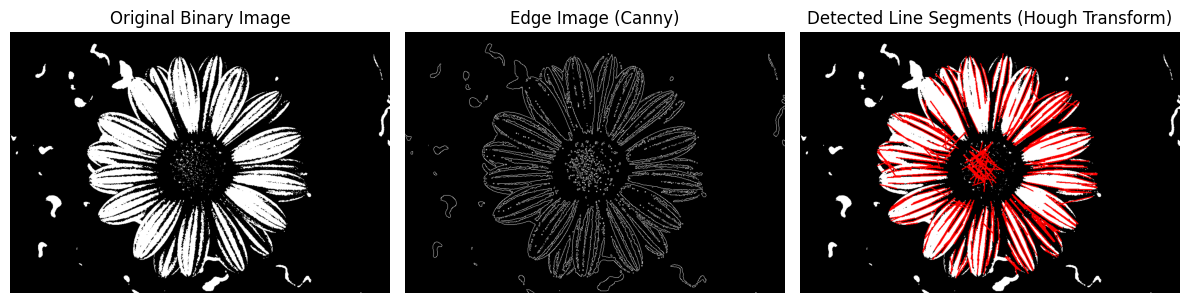

In [6]:
# Display results 
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(binary, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Image (Canny)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
plt.title('Detected Line Segments (Hough Transform)')
plt.axis('off')

plt.tight_layout()
plt.show()